# **`Exercise 1`**

In [1]:
import numpy as np
from numpy.random import RandomState
import matplotlib as mpl
import matplotlib.pyplot as plt
from seaborn import countplot
from sklearn.datasets import fetch_openml
# from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (precision_score,
                             recall_score,
                             f1_score,
                             confusion_matrix,
                             classification_report,
                             ConfusionMatrixDisplay,
                            )
from sklearn.model_selection import (cross_val_score,
                                     cross_val_predict)


np.random.seed(0)
%matplotlib inline

mpl.rc("axes", labelsize=14)
mpl.rc("xtick", labelsize=14)
mpl.rc("ytick", labelsize=14)

In [2]:
# Load the mnist dataset
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)

print("X.shape: ", X.shape)
print("y.shape: ", y.shape)

X.shape:  (70000, 784)
y.shape:  (70000,)


In [3]:
print(f"Class labels: {np.unique(y)}")

Class labels: ['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']


In [4]:
# Print the first five digits in the labels
y[:5]

array(['5', '0', '4', '1', '9'], dtype=object)

In [5]:
# Convert label (y) values into integers
y = y.astype(np.uint8)

y[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

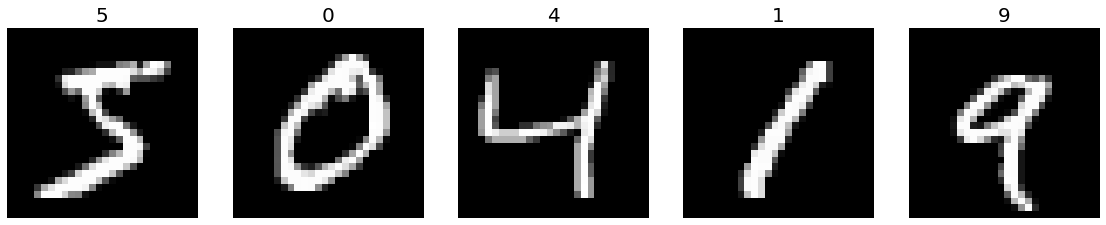

In [6]:
# Plot the first five-digits in the variables (X) array
first_5_digits = X[:5]
first_5_digits_y = y[:5]

fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(20, 3.5))

for ax, digit, label in zip(axes.flat, first_5_digits, first_5_digits_y):
    ax.imshow(digit.reshape(28, 28), cmap=mpl.cm.binary_r)
    ax.set_axis_off()
    ax.set_title(label, fontsize=20)

plt.subplots_adjust(wspace=0.05)
plt.show()

# Splitting Datasets

In [7]:
# Split "X" and "y" datasets into train and test sets
X_train, y_train = X[:60000], y[:60000]
X_test, y_test = X[60000:], y[60000:]

print("X_train.shape: ", X_train.shape)
print("y_train.shape: ", y_train.shape, "\n")
print("X_test.shape: ", X_test.shape)
print("y_test.shape: ", y_test.shape)

X_train.shape:  (60000, 784)
y_train.shape:  (60000,) 

X_test.shape:  (10000, 784)
y_test.shape:  (10000,)


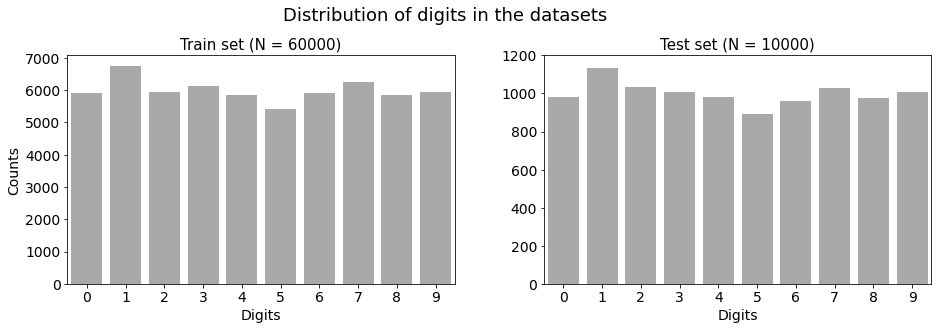

In [8]:
# Data distribution in the train set
fig = plt.figure(figsize=(15, 4.5))
ax1 = fig.add_subplot(121); countplot(x=y_train, color="darkgray", ax=ax1)
ax1.set(xticks=range(10),
        yticks=range(0, 7500, 1000),
        title=f"Train set (N = {len(y_train)})",
        xlabel="Digits",
        ylabel="Counts",
       )

ax2 = fig.add_subplot(122); countplot(x=y_test, color="darkgray", ax=ax2)
ax2.set(xticks=range(10),
        yticks=range(0, 1400, 200),
        xlabel="Digits",
        ylabel="",
       )

plt.suptitle("Distribution of digits in the datasets", fontsize=18)
ax1.set_title(f"Train set (N = {len(y_train)})", fontsize=15)
ax2.set_title(f"Test set (N = {len(y_test)})", fontsize=15)

plt.subplots_adjust(left=0.15, right=0.95, top=0.83, wspace=0.23)
plt.show()

There is a plenty of instances of 1's for training (6,742 instances), while, there are only 5,421 instances of number 5 in the train set.

# Data Preparation & Model Building

In [9]:
X_train_prepared = (X_train/255.0).astype(np.float16)
X_test_prepared = (X_test/255.0).astype(np.float16)

## Stochastic Gradient Descent Classifier

In [10]:
sgdc = SGDClassifier(random_state=0)
sgd_ovr = OneVsRestClassifier(sgdc)
sgd_ovr.fit(X_train_prepared, y_train)

OneVsRestClassifier(estimator=SGDClassifier(random_state=0))

In [11]:
sgd_ovr_predicted = sgd_ovr.predict(X_test_prepared)

In [12]:
# Plot 32 random digits predictions
def plot_32_random_predictions(X_test, y_pred, y_test=None, cmap=plt.cm.binary_r, random_state=None):
    if random_state != None:
        randomState = RandomState(random_state)
        digits_ix = randomState.randint(len(y_pred), size=32)   # random indices
    else:
        digits_ix = np.random.randint(len(y_pred), size=32)     # random indices
    
    digits_x = X_test[digits_ix]                                # X_test instances
    digits_predicted = y_pred[digits_ix]                        # y_predictions (labels as predicted by the classifier)
    
    _, axes = plt.subplots(nrows=4, ncols=8, figsize=(20, 11))
    for ax, digit, pred_label in zip(axes.flat, digits_x, digits_predicted):
        ax.imshow(digit.reshape(28, 28), cmap=cmap)
        ax.set_title(f"Prediction: {pred_label}", fontsize=14)
        ax.set_axis_off()
        
    plt.suptitle("Images of 32 test samples and their predicted digit value", fontsize=18)
    plt.subplots_adjust(top=0.93)
    plt.show()
    
    if y_test.any():
        print("\n\nTrue digits values:")
        print(f"{y_test[digits_ix].reshape(4, 8)}")

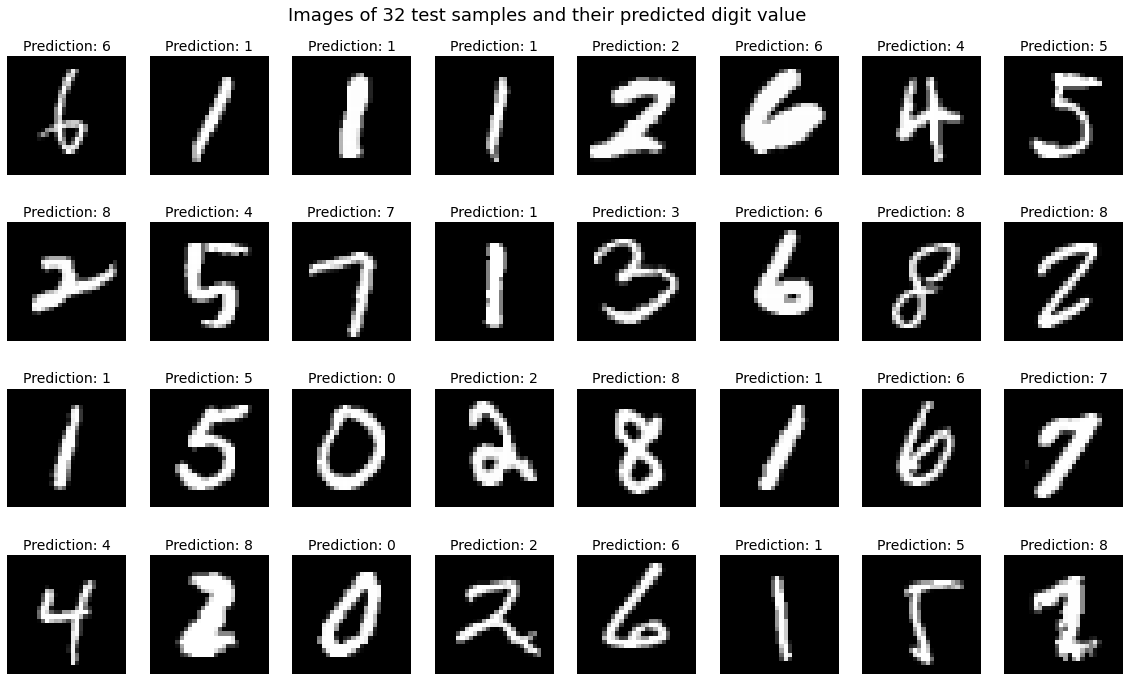



True digits values:
[[6 1 1 1 2 6 4 5]
 [2 5 7 1 3 6 8 2]
 [1 5 0 2 8 1 6 7]
 [4 2 0 2 6 1 5 2]]


In [13]:
plot_32_random_predictions(X_test_prepared, sgd_ovr_predicted, y_test, random_state=0)

* From the matrix plot above, can be easily observed that the SGD classifier has made the following misclassifications:
    * (1st column, 2nd row): True digit value = 2; Prediction = 8
    * (2nd column, 2nd row): True digit value = 5; Prediction = 4
    * (2nd column, 4th row): True digit value = 2; Prediction = 8
    * (8th column, 2nd row): True digit value = 2; Prediction = 8
    * (8th column, 4th row): True digit value = 2; Prediction = 8

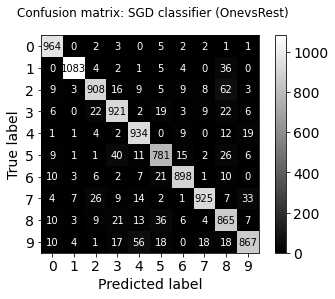

In [14]:
# Plot confusion matrix for the SGD Classifier
sgd_ovr_conf_mx = ConfusionMatrixDisplay.from_predictions(y_test, sgd_ovr_predicted, cmap="binary_r")
sgd_ovr_conf_mx.figure_.suptitle("Confusion matrix: SGD classifier (OnevsRest)")

plt.show()

In [15]:
sgd_scores = cross_val_score(sgd_ovr, X_test_prepared, y_test, cv=5, scoring="accuracy")

In [16]:
print("CV scores (SGD Classifier):")
for i, score in enumerate(sgd_scores, 1):
    print(f"{i}: {round(score, 4)}")
    if (i == 5):
        print(f"\nMean score: {round(sgd_scores.mean(), 4)}\n")

CV scores (SGD Classifier):
1: 0.8575
2: 0.859
3: 0.8825
4: 0.9035
5: 0.909

Mean score: 0.8823



Not bad for a simple linear model with the default parameters!

In [17]:
sgd_ovr_report = classification_report(y_test, sgd_ovr_predicted)
print("Classification report: SGD classifier (OneVsRest)\n")
print(sgd_ovr_report)

Classification report: SGD classifier (OneVsRest)

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       980
           1       0.98      0.95      0.97      1135
           2       0.92      0.88      0.90      1032
           3       0.89      0.91      0.90      1010
           4       0.89      0.95      0.92       982
           5       0.88      0.88      0.88       892
           6       0.95      0.94      0.94       958
           7       0.95      0.90      0.93      1028
           8       0.82      0.89      0.85       974
           9       0.92      0.86      0.89      1009

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.92      0.91      0.91     10000



In [18]:
prng = RandomState(42)
print(prng.randint(32, size=10))

prng2 = RandomState(42)
print(prng2.randint(32, size=10))
# array([ 1,  1, -1,  0,  0, -1,  1,  0, -1, -1])

[ 6 19 28 14 10  7 28 20  6 25]
[ 6 19 28 14 10  7 28 20  6 25]


## Support Vector Classifier

In [19]:
svc = SVC(random_state=0)
svc_ovr = OneVsRestClassifier(svc)
svc_ovr.fit(X_train_prepared[:2000], y_train[:2000])

OneVsRestClassifier(estimator=SVC(random_state=0))

In [20]:
svc_ovr_predicted = svc_ovr.predict(X_test_prepared)

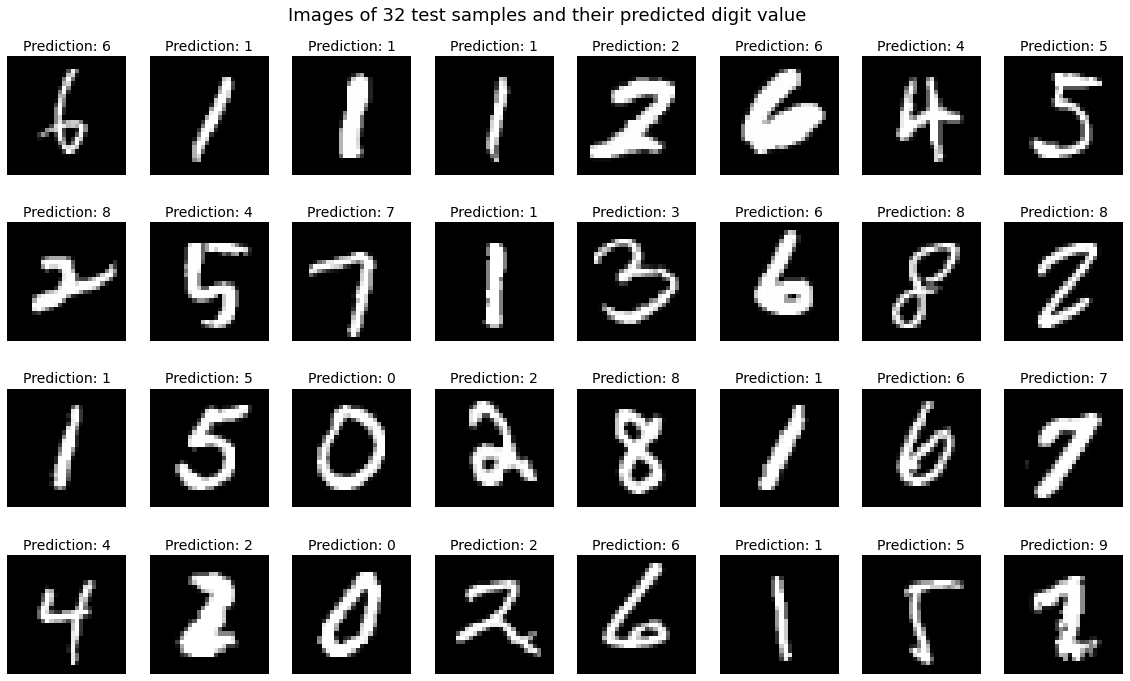



True digits values:
[[6 1 1 1 2 6 4 5]
 [2 5 7 1 3 6 8 2]
 [1 5 0 2 8 1 6 7]
 [4 2 0 2 6 1 5 2]]


In [21]:
plot_32_random_predictions(X_test_prepared, svc_ovr_predicted, y_test, random_state=0)

* Per the matrix plot above, the Support Vector classifier has made less number of misclassifications compared to the SGD classifier:
    * (1st column, 2nd row): True digit value = 2; Prediction = 8   -> same as the SGD classifier
    * (2nd column, 2nd row): True digit value = 5; Prediction = 4   -> same as the SGD classifier
    * (2nd column, 4th row): True digit value = 2; Prediction = 2   => CORRECTLY CLASSIFIED
    * (8th column, 2nd row): True digit value = 2; Prediction = 8   -> same as the SGD classifier
    * (8th column, 4th row): True digit value = 2; Prediction = 9   -> SGD classifier prediction = 8

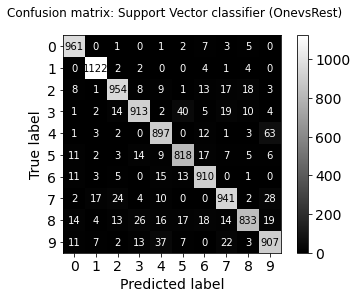

In [22]:
svc_ovr_conf_mx = ConfusionMatrixDisplay.from_predictions(y_test, svc_ovr_predicted, cmap="binary_r")
svc_ovr_conf_mx.figure_.suptitle("Confusion matrix: Support Vector classifier (OnevsRest)")

plt.show()

In [23]:
svc_scores = cross_val_score(svc_ovr, X_test_prepared[:2000], y_test[:2000], cv=5, scoring="accuracy")

In [24]:
print("Scores (SVC):")
for i, score in enumerate(svc_scores, 1):
    print(f"{i}: {round(score, 4)}")
    if (i == 5):
        print(f"\nMean score: {round(svc_scores.mean(), 4)}\n")

Scores (SVC):
1: 0.9275
2: 0.915
3: 0.9125
4: 0.9025
5: 0.9125

Mean score: 0.914



The classification performance is slightly better compared to that of the SGD Classifier!

In [25]:
svc_ovr_report = classification_report(y_test, svc_ovr_predicted)
print("Classification report: Support Vector classifier (OneVsRest)\n")
print(svc_ovr_report)

Classification report: Support Vector classifier (OneVsRest)

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       980
           1       0.97      0.99      0.98      1135
           2       0.94      0.92      0.93      1032
           3       0.93      0.90      0.92      1010
           4       0.90      0.91      0.91       982
           5       0.91      0.92      0.91       892
           6       0.92      0.95      0.94       958
           7       0.92      0.92      0.92      1028
           8       0.94      0.86      0.90       974
           9       0.88      0.90      0.89      1009

    accuracy                           0.93     10000
   macro avg       0.93      0.92      0.92     10000
weighted avg       0.93      0.93      0.93     10000



## Random Forest Classifier

In [26]:
forestc = RandomForestClassifier(random_state=0)
forestc.fit(X_train_prepared, y_train)

RandomForestClassifier(random_state=0)

In [27]:
forestc_predicted = forestc.predict(X_test_prepared)

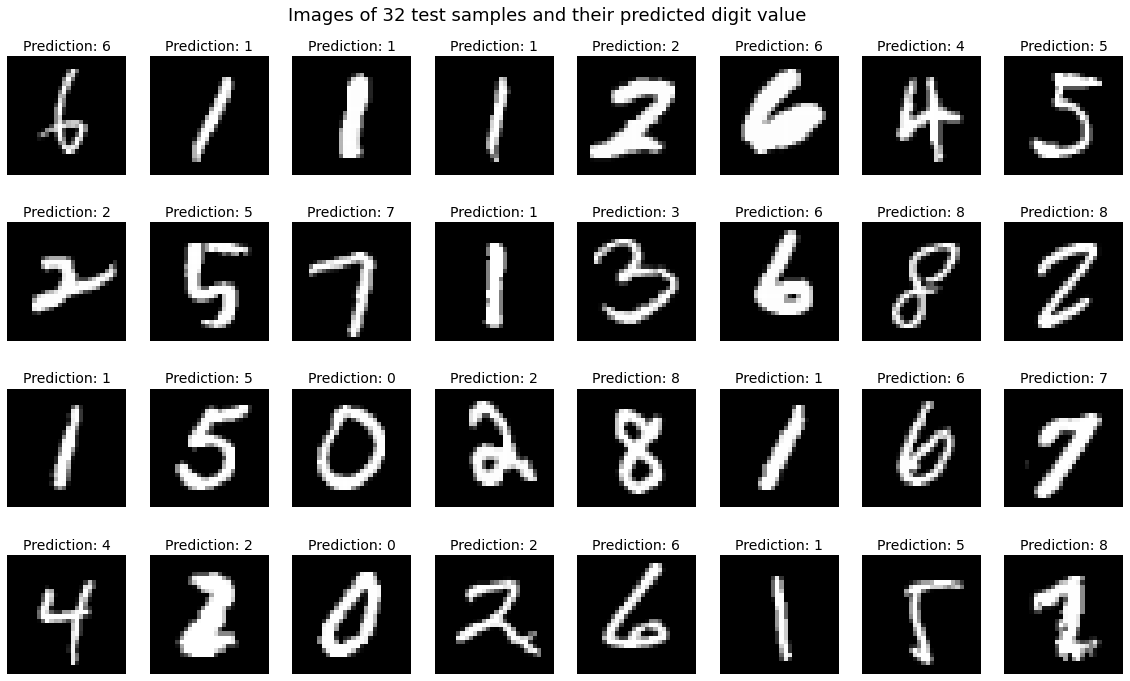



True digits values:
[[6 1 1 1 2 6 4 5]
 [2 5 7 1 3 6 8 2]
 [1 5 0 2 8 1 6 7]
 [4 2 0 2 6 1 5 2]]


In [28]:
plot_32_random_predictions(X_test_prepared, forestc_predicted, y_test, random_state=0)

* Comparing the output of the matrix plot (see Figure above) with those of the SGD and SV classifiers:
    * (1st column, 2nd row): True digit value = 2; Prediction = 2   => CORRECTLY CLASSIFIED
    * (2nd column, 2nd row): True digit value = 5; Prediction = 5   => CORRECTLY CLASSIFIED
    * (2nd column, 4th row): True digit value = 2; Prediction = 2   => CORRECTLY CLASSIFIED
    * (8th column, 2nd row): True digit value = 2; Prediction = 8   -> same as the SGD and SV classifiers
    * (8th column, 4th row): True digit value = 2; Prediction = 8   -> same as the SGD classifier prediction = 8, SV classifier prediction = 9

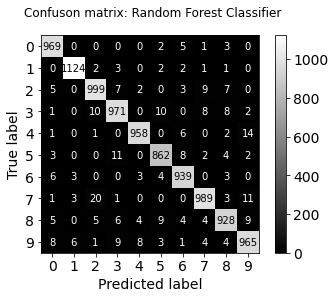

In [29]:
forestc_conf_mx = ConfusionMatrixDisplay.from_predictions(y_test, forestc_predicted, cmap="binary_r")
forestc_conf_mx.figure_.suptitle("Confuson matrix: Random Forest Classifier")

plt.show()

Confusion matrix of the Random Forest Classifier shows even better performance on the MNIST digits classification since most of the digits are well classified (significatnt number of digits on the main diagonal).

In [30]:
forestc_scores = cross_val_score(forestc, X_test_prepared, y_test, cv=5, scoring="accuracy")

In [31]:
print("Scores (Random Forest Classifier):")
for i, score in enumerate(forestc_scores, 1):
    print(f"{i}: {round(score, 4)}")
    if (i == 5):
        print(f"\nMean score: {round(forestc_scores.mean(), 4)}")

Scores (Random Forest Classifier):
1: 0.9255
2: 0.9245
3: 0.9495
4: 0.962
5: 0.9655

Mean score: 0.9454


Amazingly, the Random Forest Classifier has shown an excellent performance classifying the digits in the test set.

Next tasks will focus on optimizing the Random Forest Classifier model hyperparameters using Cross Validation and GridSearchCV in order to improve model performance.